# Logistic Regression

In [14]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
# the dataset is loaded from the data file into the variables X
# and y:

data = genfromtxt('./data/ex2data1.txt', delimiter=',')

X = data[:, [0,1]]
y = data[: , 2]

m,n = X.shape

In [3]:
m,n

(100, 2)

In [4]:
X[:10], y[:10]

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331]]),
 array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.]))

Text(0, 0.5, 'Exam 2 Score')

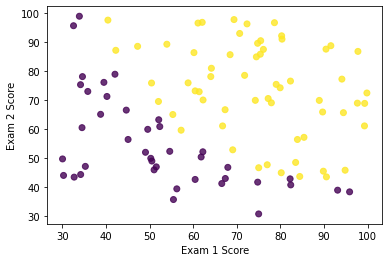

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, alpha = 0.8)

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [17]:
# sigmoid function

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

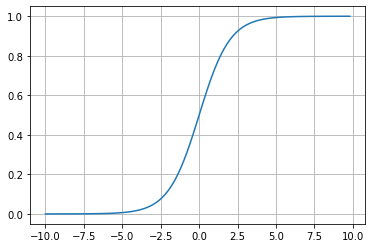

In [18]:
plt.plot(np.arange(-10, 10, 0.2), sigmoid(np.arange(-10, 10, 0.2)))
plt.grid(True)

**Cost Function**

![Cost Function of Logistic Regression](./images/logistic_regression-cost_function.png)

**Gradient**

![Gradient](./images/logistic_regression-gradient.png)

In [15]:
# we add another dimension to our data to accommodate the θ0 intercept term. 
# We also initialize the initial parameters to 0 and the
# learning rate alpha to 0.01.

X = np.column_stack((np.ones(m), X))

In [16]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [409]:
def computeCost(X, y, theta):
    m,n = X.shape
    
    theta = np.array(theta).reshape(n,1)
    
    h = sigmoid(X.dot(theta))

    J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    grad = (1/m)*X.T.dot(h-y)
    
    return J, grad

In [410]:
J, grad = computeCost(X, y, [0, 0, 0])

J, grad

(0.6931471805599453,
 array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

In [405]:
J, grad = computeCost(X, y, [-24, 0.2, 0.2])

J, grad

(0.21833019382659774,
 array([[0.04290299],
        [2.56623412],
        [2.64679737]]))

**Using Gardient Descent to train**

In [397]:
def gradientDescent(X, y, theta, learning_rate, epoch):
    m,n = X.shape
    J_hist = []
    
    theta = np.array(theta).reshape(n,1)
    
    for iter in range(epoch):
        h = sigmoid(X.dot(theta))
        d = h - y
        gradient = (1/m)*X.T.dot(h-y)
#         cost, gradient = computeCost(X, y, theta)
        
        theta = theta - (learning_rate * gradient)
        
#         J_hist.append(cost)
        
    return theta#, J_hist

In [398]:
t = gradientDescent(X,y, [0,0,0], 0.01, 400)

t

array([[-0.30607129],
       [ 0.35509504],
       [-0.11375313]])

In [404]:
computeCost(X,y, t)

(4.794753361216823,
 array([[ 0.39023471],
        [20.48171735],
        [20.93428842]]))

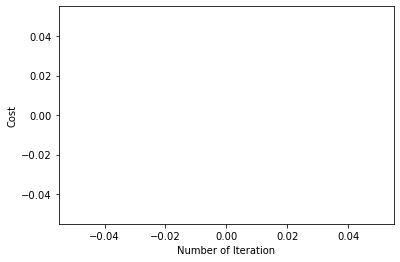

In [384]:
# cost vs iteration
plt.plot(range(iterations), J_h)

plt.ylabel('Cost')
plt.xlabel('Number of Iteration')
plt.show()

## Regularized logistic regression